In [1]:
# Core libraries for analysis and plotting
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
# Exponential decay model used for fitting unknotting probability
def exponential_decay(x, a, b):
    return a*np.exp(-x/b)

In [3]:
# System sizes and corresponding volumes (scaled later by 0.9)
L=[10,15,20,25,30,35,40,45,50]
V=np.array([l**3 for l in L])

In [4]:
# Load knotting profile data for each knot type from precomputed files
data={}
knot_types=[]
folders=["prob_3_1#3_1#3_1.dat", "prob_4_1#4_1.dat", "prob_undetermined_knots.dat", "prob_0_1.dat", "prob_3_1#4_1.dat", "prob_5_1.dat", "prob_3_1.dat", "prob_4_1.dat", "prob_5_2.dat", "prob_3_1#3_1.dat", "prob_4_1#3_1.dat", "prob_composite_knots.dat"]
for folder in folders:
    knot_type=folder.strip(".dat").strip("prob_")
    knot_types.append(knot_type)
    data[knot_type]=np.loadtxt(folder)

In [5]:
# Total number of conformations per knot type (used for normalization)
total_confs=np.array([np.sum(data[knot_type][:,1]) for knot_type in knot_types])

In [6]:
# Extract unknotting probability and its complement with associated uncertainties
unknotted=data['0_1'][:,1]
knotted=1-data['0_1'][:,1]
knotted_err=data['0_1'][:,2]

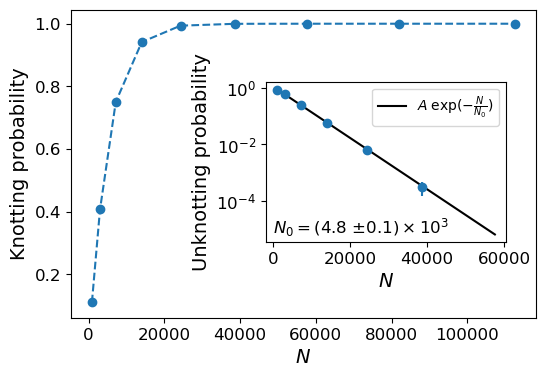

In [7]:
# Plot overall knotting probability and inset exponential fit on unknotting probability
fig = plt.figure(figsize=(6,4))
plt.errorbar(0.9*V,knotted, yerr=knotted_err, fmt='--o')
plt.xlabel(r'$N$', fontsize=14)
plt.ylabel(r'Knotting probability', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Inset: fit exponential decay on first part of the data
ax2 = fig.add_axes([0.45, 0.3, 0.4, 0.4]) # [x, y, width, height] in figure coordinates

x_subset=0.9*V[:6]
y_subset=unknotted[:6]
y_err_subset=knotted_err[:6]
x_fit=np.linspace(x_subset[0], 0.9*V[6], 1000)
ax2.errorbar(x_subset, y_subset, yerr=y_err_subset, fmt='o')
params, covariance = curve_fit(exponential_decay, x_subset[1:], y_subset[1:], p0=[1,5000], sigma=y_err_subset[1:], absolute_sigma=True, maxfev=100000)
ax2.plot(x_fit, exponential_decay(x_fit, params[0], params[1]), '-', color='k', label=r'$A \;\exp(-\frac{N}{N_0})$')
ax2.set_xlabel(r'$N$', fontsize=14)
ax2.set_ylabel(r'Unknotting probability', fontsize=14)
ax2.set_yscale('log')
ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.text(20, 0.000007, r'$N_0 = $(4.8 $\pm 0.1) \times 10^3$', fontsize=12, color='k')
plt.legend(fontsize=10)
plt.savefig('Knotting_probability.pdf', dpi=330, bbox_inches='tight')
plt.show()

In [8]:
# Read multiplicity data for each system size from knot analysis outputs
L=[10,15,20,25,30]
folders=[f'chain_coordinates_{l}x{l}x{l}/multiplicity.dat' for l in L]
data={}
for i in range(len(folders)):
    with open(folders[i],'r') as f:
        lines=f.readlines()
        tmp=[]
        for line in lines:
            tmp.append([line.strip().split()[1], int(line.strip().split()[0])])
        data[L[i]] = tmp

In [9]:
# Tally knot multiplicities per size and derive fractional contributions
n_0_1=[]  
n_3_1=[]
n_4_1=[]
n_5_1=[]
n_5_2=[]
n_other_primes=[]
n_3_1_3_1=[]
n_3_1_4_1=[]
n_3_1_3_1_3_1=[]
n_other_composite=[]
n_primes=[]
n_composite=[]
total_confs=[]

for l in L:
    x=0
    y=0
    for i in range(len(data[l])):
        if data[l][i][0]=='0_1':
            n_0_1.append(data[l][i][1])
        elif data[l][i][0]=='3_1':
            n_3_1.append(data[l][i][1])
        elif data[l][i][0]=='4_1':
            n_4_1.append(data[l][i][1])
        elif data[l][i][0]=='5_1':
            n_5_1.append(data[l][i][1])
        elif data[l][i][0]=='5_2':
            n_5_2.append(data[l][i][1])
        elif data[l][i][0]=='3_1#3_1':
            n_3_1_3_1.append(data[l][i][1])
        elif data[l][i][0]=='3_1#4_1':
            n_3_1_4_1.append(data[l][i][1])
        elif data[l][i][0]=='3_1#3_1#3_1':
            n_3_1_3_1_3_1.append(data[l][i][1])
        if "#" in data[l][i][0]:
            y+=data[l][i][1]
        else:
            x+=data[l][i][1]
    n_primes.append(x)
    n_composite.append(y)
    total_confs.append(np.sum([data[l][i][1] for i in range(len(data[l]))]))

# Convert counts to fractions of total configurations
frac_0_1=[]  
frac_3_1=[]
frac_4_1=[]
frac_5_1=[]
frac_5_2=[]
frac_other_primes=[]
frac_3_1_3_1=[]
frac_3_1_4_1=[]
frac_3_1_3_1_3_1=[]
frac_other_composite=[]
for i in range(len(L)):
    frac_0_1.append(n_0_1[i] / total_confs[i])
    frac_3_1.append(n_3_1[i] / total_confs[i])
    frac_4_1.append(n_4_1[i] / total_confs[i])
    frac_5_1.append(n_5_1[i] / total_confs[i])
    frac_5_2.append(n_5_2[i] / total_confs[i])
    frac_other_primes.append( (n_primes[i] - n_0_1[i] - n_3_1[i] - n_4_1[i] - n_5_1[i] - n_5_2[i]) / total_confs[i])
    frac_3_1_3_1.append(n_3_1_3_1[i] / total_confs[i])
    frac_3_1_4_1.append(n_3_1_4_1[i] / total_confs[i])
    frac_3_1_3_1_3_1.append(n_3_1_3_1_3_1[i] / total_confs[i])
    frac_other_composite.append( (n_composite[i] - n_3_1_3_1[i] - n_3_1_4_1[i] - n_3_1_3_1_3_1[i]) / total_confs[i])


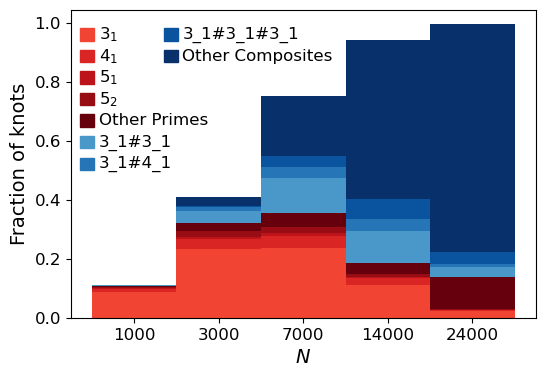

In [10]:
# Visualize knot composition as stacked histogram across system sizes
# colormap for stacked histogram
cmap_primes = plt.get_cmap("Reds")
cmap_composite = plt.get_cmap("Blues")
colors_primes = [cmap_primes(i) for i in np.linspace(0.6, 1, 5)]
colors_composite = [cmap_composite(i) for i in np.linspace(0.6, 1, 4)]
all_colors = colors_primes + colors_composite

x=np.array([-0.5,0.5,1.5,2.5,3.5,4.5])

y=0.5*(x[:-1]+x[1:])
plt.figure(figsize=(6,4))
plt.hist([y,y,y,y,y,y,y,y,y],bins=x, weights=[frac_3_1,frac_4_1,frac_5_1,frac_5_2,frac_other_primes,frac_3_1_3_1,frac_3_1_4_1,frac_3_1_3_1_3_1,frac_other_composite], stacked=True, color=all_colors, linewidth=0, edgecolor='black')
plt.xlabel(r'$N$', fontsize=14)
plt.ylabel('Fraction of knots', fontsize=14)
# round xtick labels to the nearest 1000 and format with thousands separator
tick_vals = [0.9*l**3 for l in [10,15,20,25,30]]
tick_labels = [f'{int(round(val/1000)*1000):}' for val in tick_vals]
plt.xticks([0,1,2,3,4], tick_labels, fontsize=12)
plt.yticks(fontsize=12)
# Build legends from scratch
labels = [r'$3_1$', r'$4_1$', r'$5_1$', r'$5_2$', 'Other Primes'] + [r'3_1#3_1', r'3_1#4_1', r'3_1#3_1#3_1', 'Other Composites']
handles = [plt.Rectangle((0,0),1,1, color=all_colors[i]) for i in range(len(all_colors))]
# Reorder so that '3_1#3_1#3_1' and 'Other Composites' appear below 'Other Primes' in the same column
order = [0,1,2,3,4,5,6,7,8]
labels = [labels[i] for i in order]
handles = [handles[i] for i in order]
# Draw small colored squares with labels instead of a legend
ax = plt.gca()
# extract colors from the handle rectangles created above
colors_legend = [h.get_facecolor() for h in handles]
# starting position in axes coordinates (fraction of axes) - adjust as needed
x0, y0 = 0.02, 0.92
dy = 0.07
sq_w, sq_h = 0.03, 0.04
# we want to place '3_1#3_1#3_1' to the right of '3_1' and 'Other Composites' to the right of '4_1'
side_map = {r'3_1#3_1#3_1': 0, 'Other Composites': 1}
y_positions = {}
main_idx = 0
# first place the main column (skip side entries)
for j, (col, lab) in enumerate(zip(colors_legend, labels)):
    if lab in side_map:
        continue
    y = y0 - main_idx*dy
    rect = plt.Rectangle((x0, y - sq_h/2), sq_w, sq_h, transform=ax.transAxes, color=col, clip_on=False)
    ax.add_patch(rect)
    ax.text(x0 + sq_w + 0.01, y, lab, transform=ax.transAxes, va='center', fontsize=12)
    y_positions[j] = y
    main_idx += 1
# now place the side entries next to the specified main labels
side_x = x0 + 0.18  # horizontal offset for side items; adjust as needed
for j, lab in enumerate(labels):
    if lab in side_map:
        target_main_index = side_map[lab]
        # find the original j index of the main label (3_1 is index 0, 4_1 is index 1 in the original labels list)
        # y_positions keys are original indices of main labels; target_main_index corresponds to those original indices
        # so get y from y_positions using target_main_index
        y_target = y_positions.get(target_main_index, None)
        if y_target is None:
            # fallback: place below top
            y_target = y0 - target_main_index*dy
        col = colors_legend[j]
        rect = plt.Rectangle((side_x, y_target - sq_h/2), sq_w, sq_h, transform=ax.transAxes, color=col, clip_on=False)
        ax.add_patch(rect)
        ax.text(side_x + sq_w + 0.01, y_target, lab, transform=ax.transAxes, va='center', fontsize=12)
# adjust x0, y0, dy, sq_w, sq_h, side_x or fontsize if labels overlap or go outside the axes

plt.savefig('Knot_composition.pdf', dpi=330, bbox_inches='tight')
plt.show()